In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [2]:
#Carregar os dados
dados = pd.read_csv("penguins.csv")

# Filtrar os atributos e a coluna de classe
atributos = dados.iloc[:, :-1].values
especie = dados.iloc[:,-1].values


# Normalizar os dados
escalonador = StandardScaler()
atributos_escalonados = escalonador.fit_transform(atributos)



In [4]:
# Calcular a matriz de covariância
matriz_covariancia = np.cov(atributos_escalonados.T)

# Calcular os autovalores e autovetores
autovalores, autovetores = np.linalg.eig(matriz_covariancia)

# Ordenar os autovalores e autovetores
ordem = np.argsort(autovalores)[::-1]
autovalores = autovalores[ordem]
autovetores = autovetores[:, ordem]

# Projetar os dados em 2 dimensões
autovetores_2d = autovetores[:, :2]
atributos_pca_2d = atributos_escalonados.dot(autovetores_2d)


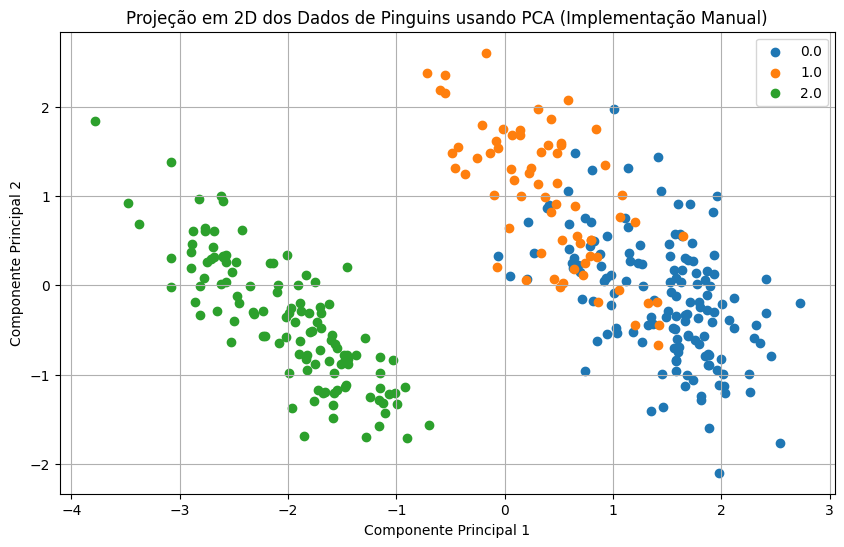

In [5]:

# Plotar a projeção em 2D
plt.figure(figsize=(10, 6))
for especie_nome in np.unique(especie):
    indices = especie == especie_nome
    if np.any(indices):  # Verificar se há dados para essa espécie
        plt.scatter(atributos_pca_2d[indices, 0], atributos_pca_2d[indices, 1], label=especie_nome)
    else:
        print(f"Sem dados para a espécie: {especie_nome}")

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Projeção em 2D dos Dados de Pinguins usando PCA (Implementação Manual)')
plt.legend()
plt.grid(True)
plt.show()


Variância explicada para 1 componente: 68.59%
Variância explicada para 2 componentes: 88.08%
Variância explicada para 3 componentes: 97.31%
Variância explicada para 4 componentes: 100.00%


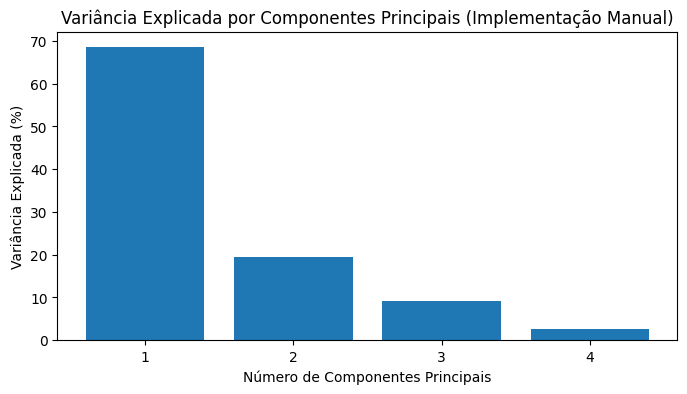

In [6]:

# Variância explicada
variancia_explicada = autovalores / np.sum(autovalores)

print("Variância explicada para 1 componente: {:.2f}%".format(variancia_explicada[0] * 100))
print("Variância explicada para 2 componentes: {:.2f}%".format(sum(variancia_explicada[:2]) * 100))
print("Variância explicada para 3 componentes: {:.2f}%".format(sum(variancia_explicada[:3]) * 100))
print("Variância explicada para 4 componentes: {:.2f}%".format(sum(variancia_explicada[:4]) * 100))

# Exibir gráfico da variância explicada
plt.figure(figsize=(8, 4))
plt.bar(range(1, 5), variancia_explicada[:4] * 100, tick_label=[1, 2, 3, 4])
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada (%)')
plt.title('Variância Explicada por Componentes Principais (Implementação Manual)')
plt.show()
